## Conexión a google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ./drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks'

In [ ]:
import pickle

# Importar los resultados

## CNN

## Experimentos A

In [ ]:
with open('./systems_evaluations/CNN_S2_CROSS_VALIDATION.dict', 'rb') as file_handler:
  cnn_cv_A = pickle.load(file_handler)

In [ ]:
cnn_val_A = dict(zip(cnn_cv_A.keys(), [v[1] for v in cnn_cv_A.values()]))

In [ ]:
with open('./systems_evaluations/CNN_S2_TEST_RESULTS.dict', 'rb') as file_handler:
  cnn_test_A = pickle.load(file_handler)

In [ ]:
list(cnn_val_A.values())[5].mean(axis=0)

A_acc       0.827800
B1_acc      0.909998
B2_acc      0.836998
A1_f1       0.818048
B1_f1       0.880401
B2_f1       0.815091
F1_multi    0.837846
EMR         0.788597
dtype: float64

## Experimentos B

### ADAM 4

In [ ]:
import pickle

In [ ]:
with open('./systems_evaluations/CNN_ADAM4_CV_EXP_B.dict', 'rb') as file_handler:
  cnn_cv_B1 = pickle.load(file_handler)

In [ ]:
cnn_val_B1 = dict(zip(cnn_cv_B1.keys(), [v[1] for v in cnn_cv_B1.values()]))

In [ ]:
with open('./systems_evaluations/CNN_ADAM4_TEST_EXP_B.dict', 'rb') as file_handler:
  cnn_test_B1 = pickle.load(file_handler)

In [ ]:
list(cnn_val_B1.values())[2].mean(axis=0)

### ADAM 5

In [ ]:
with open('./systems_evaluations/CNN_ADAM5_CV_EXP_B.dict', 'rb') as file_handler:
  cnn_cv_B2 = pickle.load(file_handler)

In [ ]:
cnn_val_B2 = dict(zip(cnn_cv_B2.keys(), [v[1] for v in cnn_cv_B2.values()]))

In [ ]:
with open('./systems_evaluations/CNN_ADAM5_TEST_EXP_B.dict', 'rb') as file_handler:
  cnn_test_B2 = pickle.load(file_handler)

In [ ]:
list(cnn_val_B2.values())[2].mean(axis=0)

A_acc       0.803601
B1_acc      0.897801
B2_acc      0.802400
A1_f1       0.792026
B1_f1       0.860280
B2_f1       0.780270
F1_multi    0.810858
EMR         0.756601
dtype: float64

### LSTM1

In [ ]:
with open('./systems_evaluations/LSTM_M1_S2_CROSS_VALIDATION.dict', 'rb') as file_handler:
  lstm1_cv = pickle.load(file_handler)

In [ ]:
lstm1_val = dict(zip(lstm1_cv.keys(), [v[1] for v in lstm1_cv.values()]))

In [ ]:
with open('./systems_evaluations/LSTM_M1_S2_TEST_RESULTS.dict', 'rb') as file_handler:
  lstm1_test= pickle.load(file_handler)

In [ ]:
with open('./systems_evaluations/LSTM_M2_S2_CROSS_VALIDATION.dict', 'rb') as file_handler:
  lstm2_cv = pickle.load(file_handler)

In [ ]:
lstm2_val = dict(zip(lstm2_cv.keys(), [v[1] for v in lstm2_cv.values()]))

In [ ]:
with open('./systems_evaluations/LSTM_M2_S2_TEST_RESULTS.dict', 'rb') as file_handler:
  lstm2_test= pickle.load(file_handler)

# Utils

In [ ]:
import numpy as np
from pandas import DataFrame
def getResultsSummary(results_dict):
  results_summaries = []
  for i, v in enumerate(results_dict.values()):
    emr_results = v['EMR']
    summary = {'min_acc':np.min(emr_results),
               'max_acc':np.max(emr_results),
               'mean_acc':np.mean(emr_results),
               'acc_std':np.std(emr_results)}
    results_summaries.append(summary)               

  return DataFrame(results_summaries)

In [ ]:
def getMedianStd(results_dict):
  std = []
  for r in results_dict.values():
    x1 = r.EMR.to_numpy()
    std.append(np.std(x1))

  std = np.array(std)

  return np.median(std)

In [ ]:
for k, v in cnn_val.items():
  print(k)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotMeanValAaccVsTestAcc(cv_results_dict, test_results_dict, model_label):

  val_median_std = getMedianStd(cv_results_dict)

  empty_arrays= True
  x_array = None
  y_array = None
  mean_acc_values = []
  c_values_list = []

  colors_list = ["green", "red"]
  colormap = colors.ListedColormap(colors_list)

  fig, ax = plt.subplots()

  for system_id in cv_results_dict.keys():

    x1 = cv_results_dict[system_id][1].EMR.to_numpy()
    val_acc_std = np.std(x1)
    mean_val_acc = np.mean(x1) 

    mean_acc_values.extend([mean_val_acc]*7)

    y = test_results_dict[system_id].EMR.to_numpy()

    if empty_arrays:
      y_array = y
      empty_arrays = False

    else:
      y_array = np.concatenate((y_array,y)) 

    if val_acc_std < val_median_std:
      c_values_list.extend([0]*7)
    else:
      c_values_list.extend([1]*7)

    
    ax.scatter(mean_acc_values, y_array, marker='o', c=c_values_list, alpha=1.5, cmap=colormap)

    ax.set_xlabel(r'$\Delta_i$', fontsize=15)
    ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
    ax.set_title('mean_v_acc vs test_acc')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotConfigurationsResults(test_results_dict, model_label):

  test_median_std = getTesMedianStd(test_results_dict, model_label)

  empty_arrays= True

  x_list = []
  y_array = None
  c_values_list = []

  colors_list = ["green", "red"]
  colormap = colors.ListedColormap(colors_list)

  fig, ax = plt.subplots()

  for idx in range(0,len(test_results_dict)):
    system_id = f"{model_label}-S2-C{idx}"

    y = test_results_dict[system_id].EMR.to_numpy()
    acc_std = np.std(y)

    x_list.extend([idx+1]*7)

    if empty_arrays:
      y_array = y
      empty_arrays = False

    else:
      y_array = np.concatenate((y_array,y)) 

    if acc_std < test_median_std:
      c_values_list.extend([0]*7)
    else:
      c_values_list.extend([1]*7)

  ax.scatter(x_list, y_array, marker='o', c=c_values_list, alpha=1.5, cmap=colormap)

  ax.set_xlabel(r'config_idx', fontsize=15)
  ax.set_ylabel(r'test_acc', fontsize=15)
  ax.set_title('test_acc resutls')
    #ax.set_xlim(0.78,0.79)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotConfigurationsValResults(val_results_dict, model_label):
  

  val_median_std = getCvMedianStd(val_results_dict, model_label)

  empty_arrays= True

  x_list = []
  y_array = None
  c_values_list = []

  colors_list = ["green", "red"]
  colormap = colors.ListedColormap(colors_list)

  fig, ax = plt.subplots()

  for idx in range(0,len(val_results_dict)):
    system_id = f"{model_label}-S2-C{idx}"

    y = val_results_dict[system_id][1].EMR.to_numpy()
    acc_std = np.std(y)

    x_list.extend([idx+1]*7)

    if empty_arrays:
      y_array = y
      empty_arrays = False

    else:
      y_array = np.concatenate((y_array,y)) 

    if acc_std < val_median_std:
      c_values_list.extend([0]*7)
    else:
      c_values_list.extend([1]*7)

  ax.scatter(x_list, y_array, marker='o', c=c_values_list, alpha=1.5, cmap=colormap)

  ax.set_xlabel(r'config_idx', fontsize=15)
  ax.set_ylabel(r'test_acc', fontsize=15)
  ax.set_title('test_acc resutls')
    #ax.set_xlim(0.78,0.79)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib import colors

def plotResultsByFold(val_emr, test_emr, mean_val_acc):

  fig, ax = plt.subplots()

  ax.scatter(range(1,8), val_emr, marker='o')
  ax.scatter(range(1,8), test_emr, marker='o')

  ax.axhline(y=mean_val_acc)

  ax.set_xlabel(r'fold', fontsize=15)
  ax.set_ylabel(r'EMR', fontsize=15)
  ax.set_title('EMR results by fold')
    #ax.set_xlim(0.78,0.79)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotResultsBoxPlots(results_dict, title_str, plot_type = 'boxplot'):
  n_results = len(results_dict)
  x_labels = [str(i) for i in range(n_results)]
  n_labels = len(x_labels)

  fig, axis = plt.subplots(figsize=(9, 4))
  EMR_results = [results_df.EMR.to_numpy() for results_df in results_dict.values()]

  if plot_type == 'boxplot':
    # BoxPlots
    axis.boxplot(EMR_results, showmeans=True)
    axis.set_title(title_str)
    #axis.set_ylim(*y_limits)

    axis.yaxis.grid(True)
    axis.set_xticks([y + 1 for y in range(n_labels)])
    axis.set_xlabel('config idx')
    axis.set_ylabel('acc')

  elif plot_type == 'violin':
    # Violin plot
    axis.violinplot(acc_data,
                  positions = [ y + 1 for y in range(n_labels) ],
                  showmeans=False,
                  showmedians=True)
    axis.set_title('{} results by {}'.format(metric,parameter))
    axis.set_ylim(*y_limits)

    axis.yaxis.grid(True)
    axis.set_xticks([ y + 1 for y in range(n_labels) ])
    axis.set_xlabel(parameter)
    axis.set_ylabel(metric)

    # add x-tick labels
    plt.setp(axis, xticks=[ y + 1 for y in range(n_labels) ], xticklabels=x_labels)
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def plotValVsTestResuts(val_EMR, test_EMR):
  x = val_EMR
  y = test_EMR
  
  mean_val_acc = np.mean(x)

  fig, ax = plt.subplots()
  ax.scatter(x, y, marker='o')

  ax.set_xlabel(r'val_EMR', fontsize=15)
  ax.set_ylabel(r'test_EMR', fontsize=15)
  ax.set_title(f"Val EMR vs Test EMR")

  ax.axvline(x=mean_val_acc)

  ax.grid(True)
  fig.tight_layout()

  plt.show()

# cnn

## Experimentos A

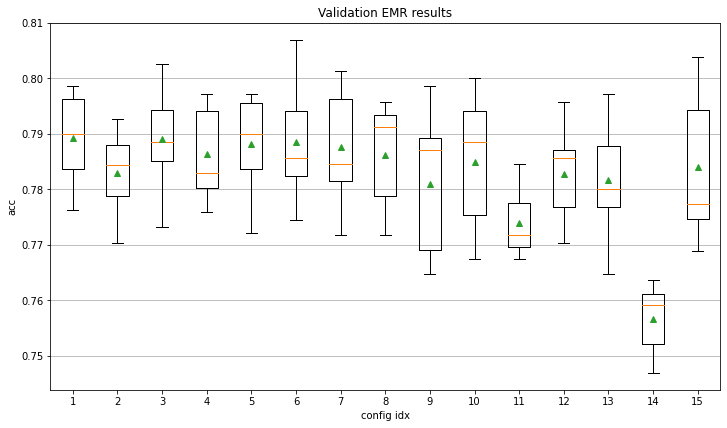

In [ ]:
plotResultsBoxPlots(cnn_val_A, 'Validation EMR results')

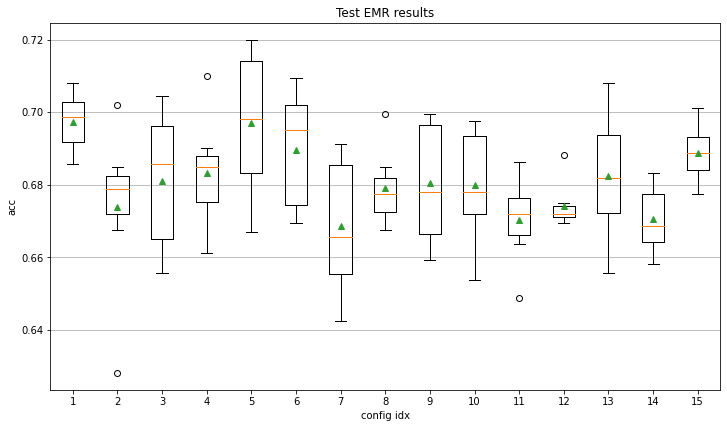

In [ ]:
plotResultsBoxPlots(cnn_test_A, 'Test EMR results')

In [ ]:
cnn_test.keys(CNN-S2-C0)

dict_keys(['CNN-S2-C0', 'CNN-S2-C1', 'CNN-S2-C2', 'CNN-S2-C3', 'CNN-S2-C4', 'CNN-S2-C5', 'CNN-S2-C6', 'CNN-S2-C7', 'CNN-S2-C8', 'CNN-S2-C9', 'CNN-S2-C10', 'CNN-S2-C11', 'CNN-S2-C12', 'CNN-S2-C13', 'CNN-S2-C14'])

In [ ]:
list(cnn_test.values())[0]

,A_acc,B1_acc,B2_acc,A1_f1,B1_f1,B2_f1,F1_multi,EMR
0,0.756875,0.855000,0.756875,0.743373,0.803689,0.723072,0.756711,0.688750
1,0.769375,0.861875,0.785625,0.755044,0.813800,0.753064,0.773969,0.705000
2,0.767500,0.866875,0.796875,0.753289,0.819922,0.764022,0.779078,0.708125
3,0.759375,0.856875,0.778750,0.743589,0.809325,0.742826,0.765247,0.698750
4,0.755625,0.865625,0.784375,0.738718,0.810131,0.744363,0.764404,0.695000
5,0.761250,0.848750,0.799375,0.755754,0.813199,0.770794,0.779916,0.685625
6,0.765000,0.866875,0.793125,0.750952,0.818663,0.753867,0.774494,0.700625


In [ ]:
cnn_val_summaries = getResultsSummary(cnn_val)

In [ ]:
cnn_val_summaries.sort_values(by='mean_acc', ascending=False).head()

,min_acc,max_acc,mean_acc,acc_std
0,0.776224,0.798601,0.789201,0.008238
2,0.773109,0.802521,0.788999,0.008933
5,0.774510,0.806993,0.788597,0.009922
4,0.772028,0.797203,0.788201,0.009088
6,0.771709,0.801399,0.787598,0.009993


In [ ]:
cnn_summaries.sort_values(by='acc_std', ascending=True).head()

,min_acc,max_acc,mean_acc,acc_std
10,0.767507,0.784615,0.773998,0.005827
13,0.746853,0.763636,0.756601,0.005886
1,0.770308,0.792717,0.783000,0.007110
3,0.775910,0.797203,0.786399,0.007931
11,0.770308,0.795804,0.782799,0.008193


In [ ]:
idx = 0
val_emr = cnn_val[f'CNN-S2-C{idx}']['EMR'].to_numpy()
test_emr = cnn_test[f'CNN-S2-C{idx}']['EMR'].to_numpy()

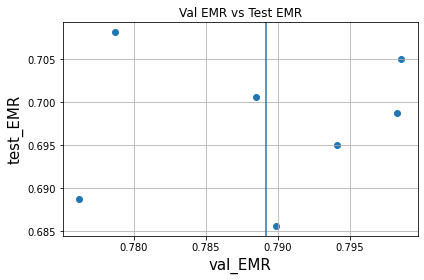

In [ ]:
plotValVsTestResuts(val_emr, test_emr)

In [ ]:
plotResultsByFold(val_emr, test_emr, cnn_summaries.loc[idx,'mean_acc'])

## Experimentos B

### ADAM 4

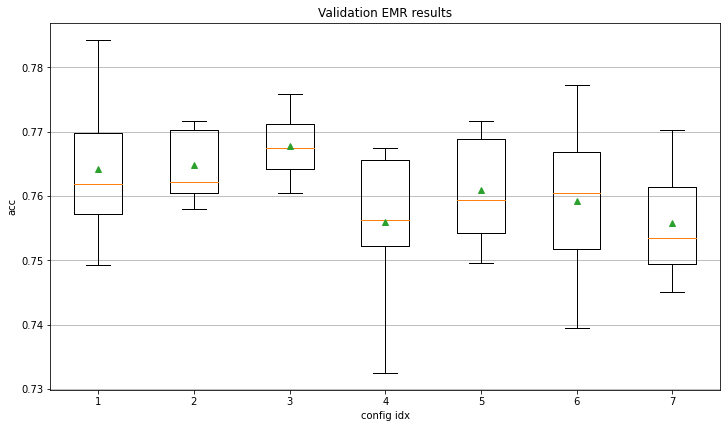

In [ ]:
plotResultsBoxPlots(cnn_val_B1, 'Validation EMR results')

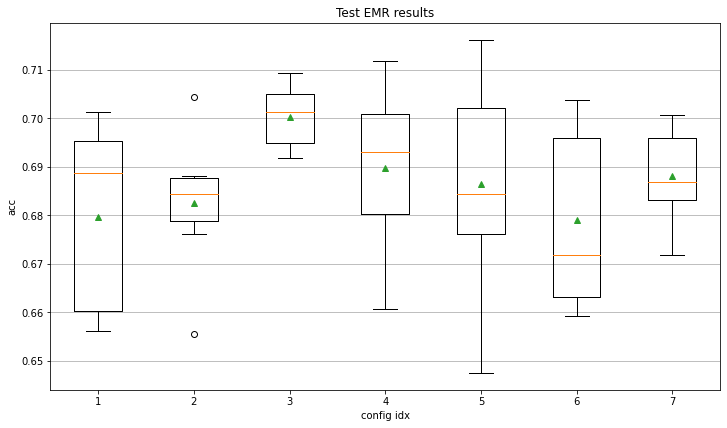

In [ ]:
plotResultsBoxPlots(cnn_test_B1, 'Test EMR results')

### ADAM 5

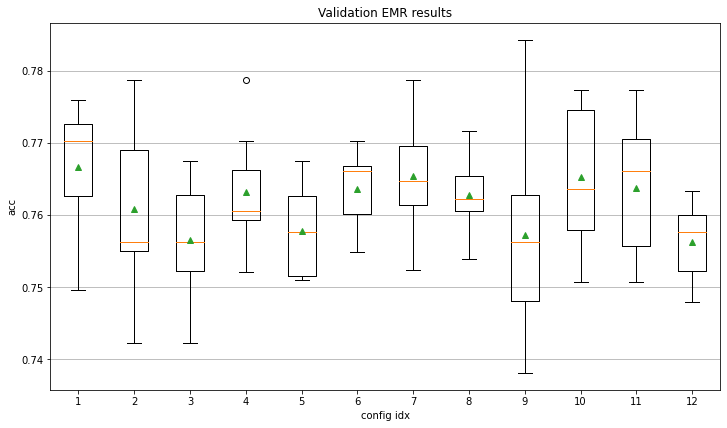

In [ ]:
plotResultsBoxPlots(cnn_val_B2, 'Validation EMR results')

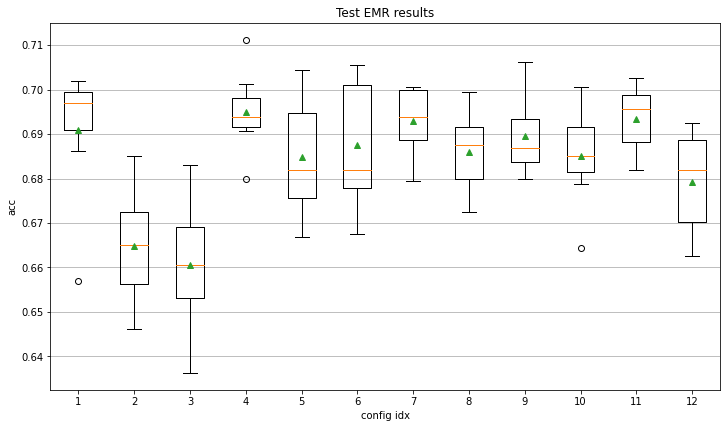

In [ ]:
plotResultsBoxPlots(cnn_test_B2, 'Test EMR results')

In [ ]:
list(cnn_test_B2.values())[0].mean(axis=0)

A_acc       0.746786
B1_acc      0.852411
B2_acc      0.769375
A1_f1       0.723857
B1_f1       0.790672
B2_f1       0.724664
F1_multi    0.746398
EMR         0.690893
dtype: float64

# lstm1

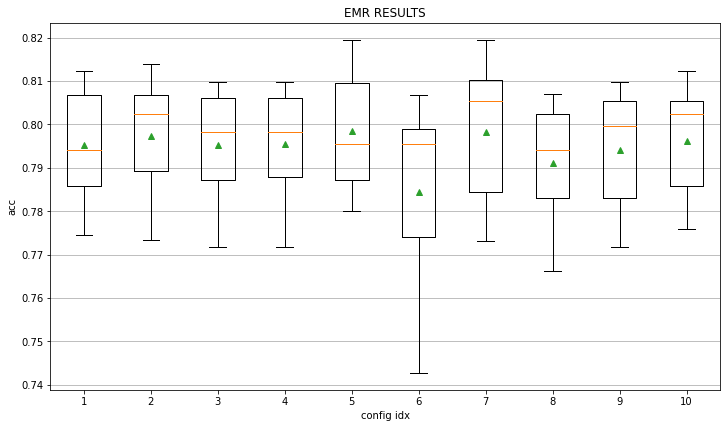

In [ ]:
plotResultsBoxPlots(lstm1_val, 'EMR RESULTS')

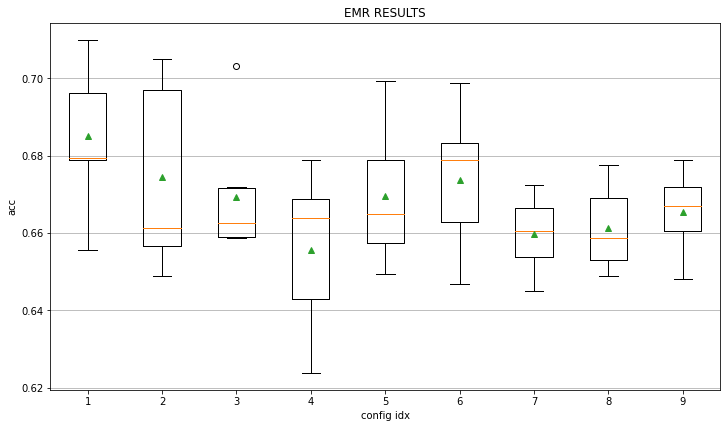

In [ ]:
plotResultsBoxPlots(lstm1_test, 'EMR RESULTS')

In [ ]:
lstm1_val_summaries = getResultsSummary(lstm1_val)

In [ ]:
lstm1_val_summaries.sort_values(by='mean_acc', ascending=False).head()

,min_acc,max_acc,mean_acc,acc_std
4,0.780112,0.819580,0.798399,0.014744
6,0.773109,0.819580,0.798199,0.016305
1,0.773427,0.813986,0.797401,0.013455
9,0.775910,0.812325,0.796201,0.013066
3,0.771709,0.809790,0.795400,0.013079


In [ ]:
lstm1_val_summaries.sort_values(by='acc_std', ascending=True).head()

,min_acc,max_acc,mean_acc,acc_std
2,0.771709,0.809790,0.795199,0.013049
9,0.775910,0.812325,0.796201,0.013066
3,0.771709,0.809790,0.795400,0.013079
0,0.774510,0.812325,0.795199,0.013202
1,0.773427,0.813986,0.797401,0.013455


In [ ]:
idx = 4
val_emr = lstm1_val[f'LSTM-M1-S2-C{idx}']['EMR'].to_numpy()
test_emr = lstm1_test[f'LSTM-M1-S2-C{idx}']['EMR'].to_numpy()

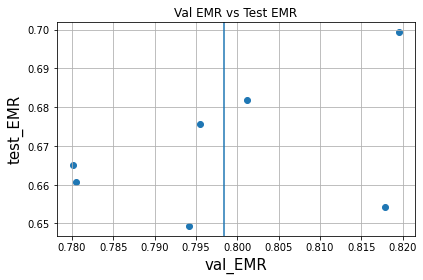

In [ ]:
plotValVsTestResuts(val_emr, test_emr)

# lstm2

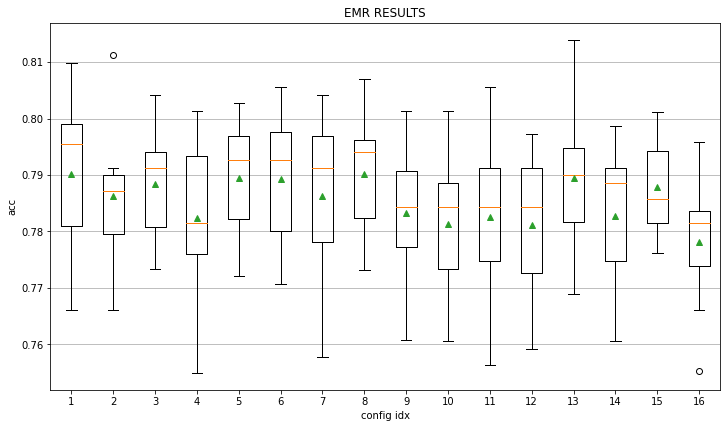

In [ ]:
plotResultsBoxPlots(lstm2_val, 'EMR RESULTS')

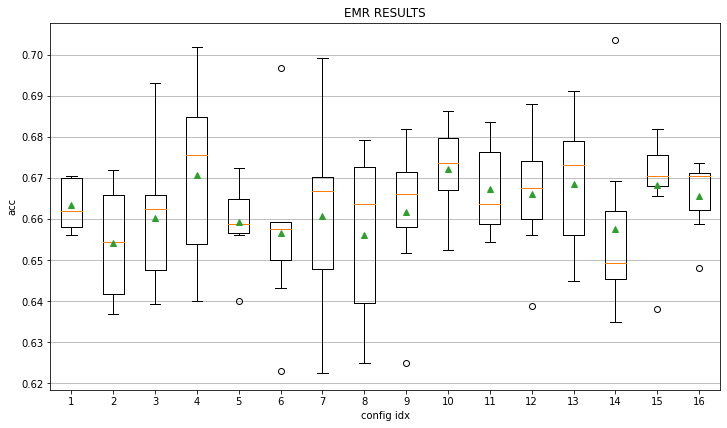

In [ ]:
plotResultsBoxPlots(lstm2_test, 'EMR RESULTS')

In [ ]:
lstm2_val_summaries = getResultsSummary(lstm2_val)

In [ ]:
lstm2_val_summaries.sort_values(by='mean_acc', ascending=False).head()

,min_acc,max_acc,mean_acc,acc_std
7,0.773109,0.806993,0.790200,0.011622
0,0.766106,0.809790,0.790199,0.014426
4,0.772028,0.802797,0.789401,0.011202
12,0.768908,0.813986,0.789398,0.014076
5,0.770629,0.805594,0.789200,0.012142


In [ ]:
lstm2_val_summaries.sort_values(by='acc_std', ascending=True).head()

,min_acc,max_acc,mean_acc,acc_std
14,0.776224,0.801120,0.787801,0.008567
2,0.773427,0.804196,0.788400,0.010324
4,0.772028,0.802797,0.789401,0.011202
7,0.773109,0.806993,0.790200,0.011622
5,0.770629,0.805594,0.789200,0.012142


In [ ]:
idx = 4
val_emr = lstm2_val[f'LSTM-M2-S2-C{idx}']['EMR'].to_numpy()
test_emr = lstm2_test[f'LSTM-M2-S2-C{idx}']['EMR'].to_numpy()

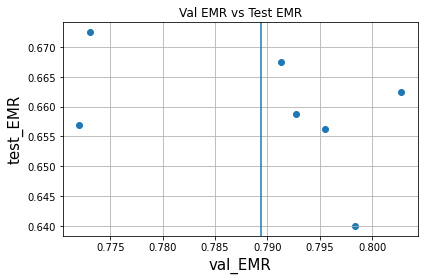

In [ ]:
plotValVsTestResuts(val_emr, test_emr)